In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
categories=["id","title","genre","description"]
data=pd.read_csv("Task1_train_data.txt",delimiter=":::",names=categories)
data

C:\Users\Durga Sreeja\AppData\Local\Temp\ipykernel_7968\2737600181.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv("Task1_train_data.txt",delimiter=":::",names=categories)


,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
# data["description"]=data["title"]+data["description"]
data["description"]

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
54209     This short-lived NBC live sitcom centered on ...
54210     The NEXT Generation of EXPLOITATION. The sist...
54211     Ze bestaan echt, is a stand-up comedy about g...
54212     Walter and Vivian live in the country and hav...
54213     On Labor Day Weekend, 1935, the most intense ...
Name: description, Length: 54214, dtype: object

In [4]:
x_train=data["description"]
y_train=data["genre"]
print(x_train)
y_train

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
54209     This short-lived NBC live sitcom centered on ...
54210     The NEXT Generation of EXPLOITATION. The sist...
54211     Ze bestaan echt, is a stand-up comedy about g...
54212     Walter and Vivian live in the country and hav...
54213     On Labor Day Weekend, 1935, the most intense ...
Name: description, Length: 54214, dtype: object


0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: genre, Length: 54214, dtype: object

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
train_m=vectorizer.fit_transform(x_train)
train_m.shape

(54214, 121110)

In [6]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(train_m,y_train)

MultinomialNB()

In [7]:
category=["title","description"]
testdata=pd.read_csv("Task1_test_data.txt",delimiter=":::",names=category)
# x_test=testdata["title"]+testdata["description"]
x_test=testdata["description"]
x_test

C:\Users\Durga Sreeja\AppData\Local\Temp\ipykernel_7968\4067314267.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  testdata=pd.read_csv("Task1_test_data.txt",delimiter=":::",names=category)


1         L.R. Brane loves his life - his car, his apar...
2         Spain, March 1964: Quico is a very naughty ch...
3         One year in the life of Albin and his family ...
4         His father has died, he hasn't spoken with hi...
5         Before he was known internationally as a mart...
                               ...                        
54196     Covering multiple genres, Tales of Light & Da...
54197     As Alice and Cora Munro attempt to find their...
54198     A movie 169 years in the making. Oliver Twist...
54199     Popular, but mysterious rock D.J Mike Mallard...
54200     Curitiba is a city in movement, with rhythms ...
Name: description, Length: 54200, dtype: object

In [8]:
test_m=vectorizer.transform(x_test)
test_m.shape

(54200, 121110)

In [9]:
test_y=pd.read_csv("Task1_test_data_solution.txt",delimiter=":::",names=categories)
y_test=test_y["genre"]
y_test

C:\Users\Durga Sreeja\AppData\Local\Temp\ipykernel_7968\2365202155.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_y=pd.read_csv("Task1_test_data_solution.txt",delimiter=":::",names=categories)


0            thriller 
1              comedy 
2         documentary 
3               drama 
4               drama 
             ...      
54195          horror 
54196         western 
54197           adult 
54198           drama 
54199           drama 
Name: genre, Length: 54200, dtype: object

In [10]:
y_test.value_counts()

genre
 drama           13612
 documentary     13096
 comedy           7446
 short            5072
 horror           2204
 thriller         1590
 action           1314
 western          1032
 reality-tv        883
 family            783
 adventure         775
 music             731
 romance           672
 sci-fi            646
 adult             590
 crime             505
 animation         498
 sport             431
 talk-show         391
 fantasy           322
 mystery           318
 musical           276
 biography         264
 history           243
 game-show         193
 news              181
 war               132
Name: count, dtype: int64

In [11]:
y_pred=mb.predict(test_m)
y_pred

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype='<U13')

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[    0,     0,     0,     0,     0,     1,     0,   308,  1005,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     3,     0,    81,   506,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     7,     0,   217,   551,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     4,     0,   185,   309,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     1,     0,   201,    62,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
  

In [13]:
print("Acuuracy score:",accuracy_score(y_test,y_pred))

Acuuracy score: 0.4426752767527675


In [14]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression(solver="lbfgs",max_iter=400,random_state=42)
l.fit(train_m,y_train)

LogisticRegression(max_iter=400, random_state=42)

In [15]:
y_pred2=l.predict(test_m)
y_pred2

array([' drama ', ' drama ', ' documentary ', ..., ' comedy ', ' drama ',
       ' documentary '], dtype=object)

In [16]:
score2=accuracy_score(y_test,y_pred2)
print("Acuuracy score:",score2)

Acuuracy score: 0.5907564575645756


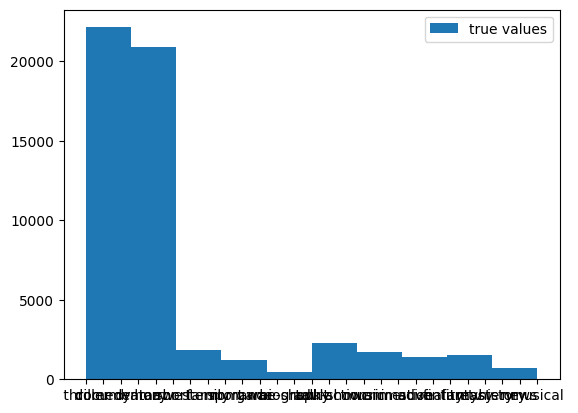

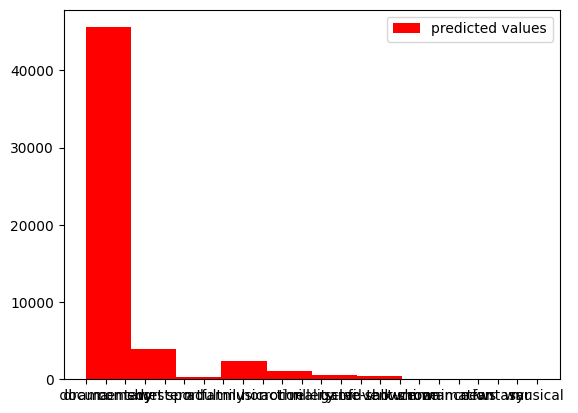

In [17]:
# plt.hist(y_pred2,histtype="bar",color="red",label=["false pridiction"])
plt.hist(y_test,histtype="bar",label=["true values"])
plt.legend(prop={'size': 10})
plt.show()
plt.hist(y_pred2,histtype="bar",color="red",label=["predicted values"])
plt.legend(prop={'size': 10})
plt.show()

<Axes: >

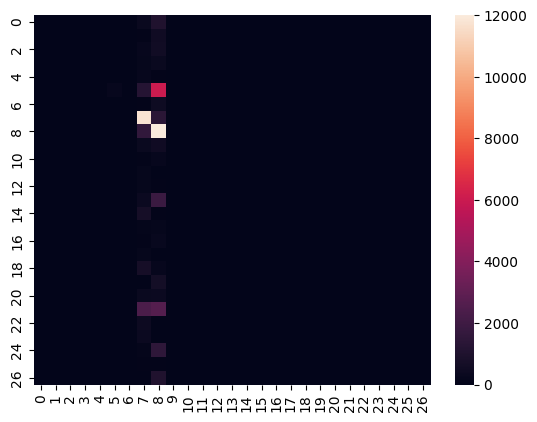

In [18]:
sns.heatmap(cm)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, zero_division=0))

               precision    recall  f1-score   support

      action        0.52      0.25      0.34      1314
       adult        0.65      0.20      0.31       590
   adventure        0.74      0.15      0.25       775
   animation        0.63      0.02      0.05       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.60      0.57      7446
       crime        0.44      0.02      0.04       505
 documentary        0.67      0.88      0.76     13096
       drama        0.54      0.80      0.64     13612
      family        0.51      0.06      0.11       783
     fantasy        0.60      0.01      0.02       322
   game-show        0.91      0.48      0.63       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.56      0.61      2204
       music        0.69      0.41      0.52       731
     musical        1.00      0.01      0.01       276
     mystery        0.00      0.00      0.00       318
        n